# Problem statement (Term Deposit Sale)


Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

## Resources Available

The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


### GitHub: https://github.com/wbasnight/AIML

### Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)

    a. Univariate analysis – data types and description of the independent attributes
    which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
    
    b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
    
    c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
    
    
2. Multivariate analysis (8 marks)

    a. Bi-variate analysis between the predictor variables and target column. Comment
    on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

    b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots
    


In [228]:
#Prevents displaying warning messages
import warnings
warnings.filterwarnings('ignore')

In [229]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [230]:
#Loading the data file
TermData = pd.read_csv("bank-full.csv")

#check the file - display the view first 5 rows of bank-full.csv
TermData.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [231]:
#check the file - display the view last 5 rows of bank-full.csv
TermData.tail() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [232]:
# displays the shape (rows and columns) of the data in the loan dataframe.
TermData.shape

(45211, 17)

In [233]:
# Checking for any null values in the data
TermData.isnull().values.any() 

False

In [234]:
#Generate pandas profiling report of the data - See PPReport.html for report
from pandas_profiling import ProfileReport
prof = ProfileReport(TermData)
prof.to_file(output_file='PPReport.html')

In [235]:
# displays the column info for bank-full.csv
TermData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [236]:
#Converting Dtype 'object' to 'category'

for feature in TermData.columns: 
    if TermData[feature].dtype == 'object': 
        TermData[feature] = pd.Categorical(TermData[feature])
TermData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [237]:
print(TermData.job.value_counts())
print(TermData.marital.value_counts())
print(TermData.education.value_counts())
print(TermData.default.value_counts())
print(TermData.housing.value_counts())
print(TermData.loan.value_counts())
print(TermData.contact.value_counts())
print(TermData.poutcome.value_counts())
print(TermData.Target.value_counts())



blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
no     39922
yes     5289
Name: Target, dtype: int64


In [238]:
#replacing catagorical values with numeric values

replaceValues = {
                "education": {"secondary": 1, "tertiary":2 , "primary": 3, "unknown": 4},
                "default": {"yes": 1, "no": 0  },
                "housing":     {"yes": 1, "no": 0  },
                "loan":     {"yes": 1, "no": 0  },
                "contact":     {"cellular": 1, "unknown": 2, "telephone" : 3 },
                "poutcome":     {"success": 1, "failure": 2, "other" : 3, "unknown": 4  },
                "Target":     {"yes": 1, "no": 0 } 
                }


TermData = pd.get_dummies(TermData, columns=['job', 'marital'])
TermData=TermData.replace(replaceValues)

In [239]:
# Displaying value counts after replacing catagorical with numeric values

print(TermData.education.value_counts())
print(TermData.default.value_counts())
print(TermData.housing.value_counts())
print(TermData.loan.value_counts())
print(TermData.contact.value_counts())
print(TermData.poutcome.value_counts())
print(TermData.Target.value_counts())


1    23202
2    13301
3     6851
4     1857
Name: education, dtype: int64
0    44396
1      815
Name: default, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
1    29285
2    13020
3     2906
Name: contact, dtype: int64
4    36959
2     4901
3     1840
1     1511
Name: poutcome, dtype: int64
0    39922
1     5289
Name: Target, dtype: int64


In [240]:
# Verifying the count of unique values for each column
TermData.nunique()

age                    77
education               4
default                 2
balance              7168
housing                 2
loan                    2
contact                 3
day                    31
month                  12
duration             1573
campaign               48
pdays                 559
previous               41
poutcome                4
Target                  2
job_admin.              2
job_blue-collar         2
job_entrepreneur        2
job_housemaid           2
job_management          2
job_retired             2
job_self-employed       2
job_services            2
job_student             2
job_technician          2
job_unemployed          2
job_unknown             2
marital_divorced        2
marital_married         2
marital_single          2
dtype: int64

In [241]:
#dropping columns not needed for modeling

TermData = TermData.drop(['day','month','duration','campaign','pdays','previous'], axis=1)

In [242]:
# Displaying the new data columns and their data type
TermData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   contact            45211 non-null  int64
 7   poutcome           45211 non-null  int64
 8   Target             45211 non-null  int64
 9   job_admin.         45211 non-null  uint8
 10  job_blue-collar    45211 non-null  uint8
 11  job_entrepreneur   45211 non-null  uint8
 12  job_housemaid      45211 non-null  uint8
 13  job_management     45211 non-null  uint8
 14  job_retired        45211 non-null  uint8
 15  job_self-employed  45211 non-null  uint8
 16  job_services       45211 non-null  uint8
 17  job_student 

In [243]:
# displays the calculations of basic statisical data
TermData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
education,45211.0,1.720488,0.866553,1.0,1.0,1.0,2.0,4.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,1.416536,0.609586,1.0,1.0,1.0,2.0,3.0
poutcome,45211.0,3.642233,0.804435,1.0,4.0,4.0,4.0,4.0
Target,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0
job_admin.,45211.0,0.114375,0.318269,0.0,0.0,0.0,0.0,1.0


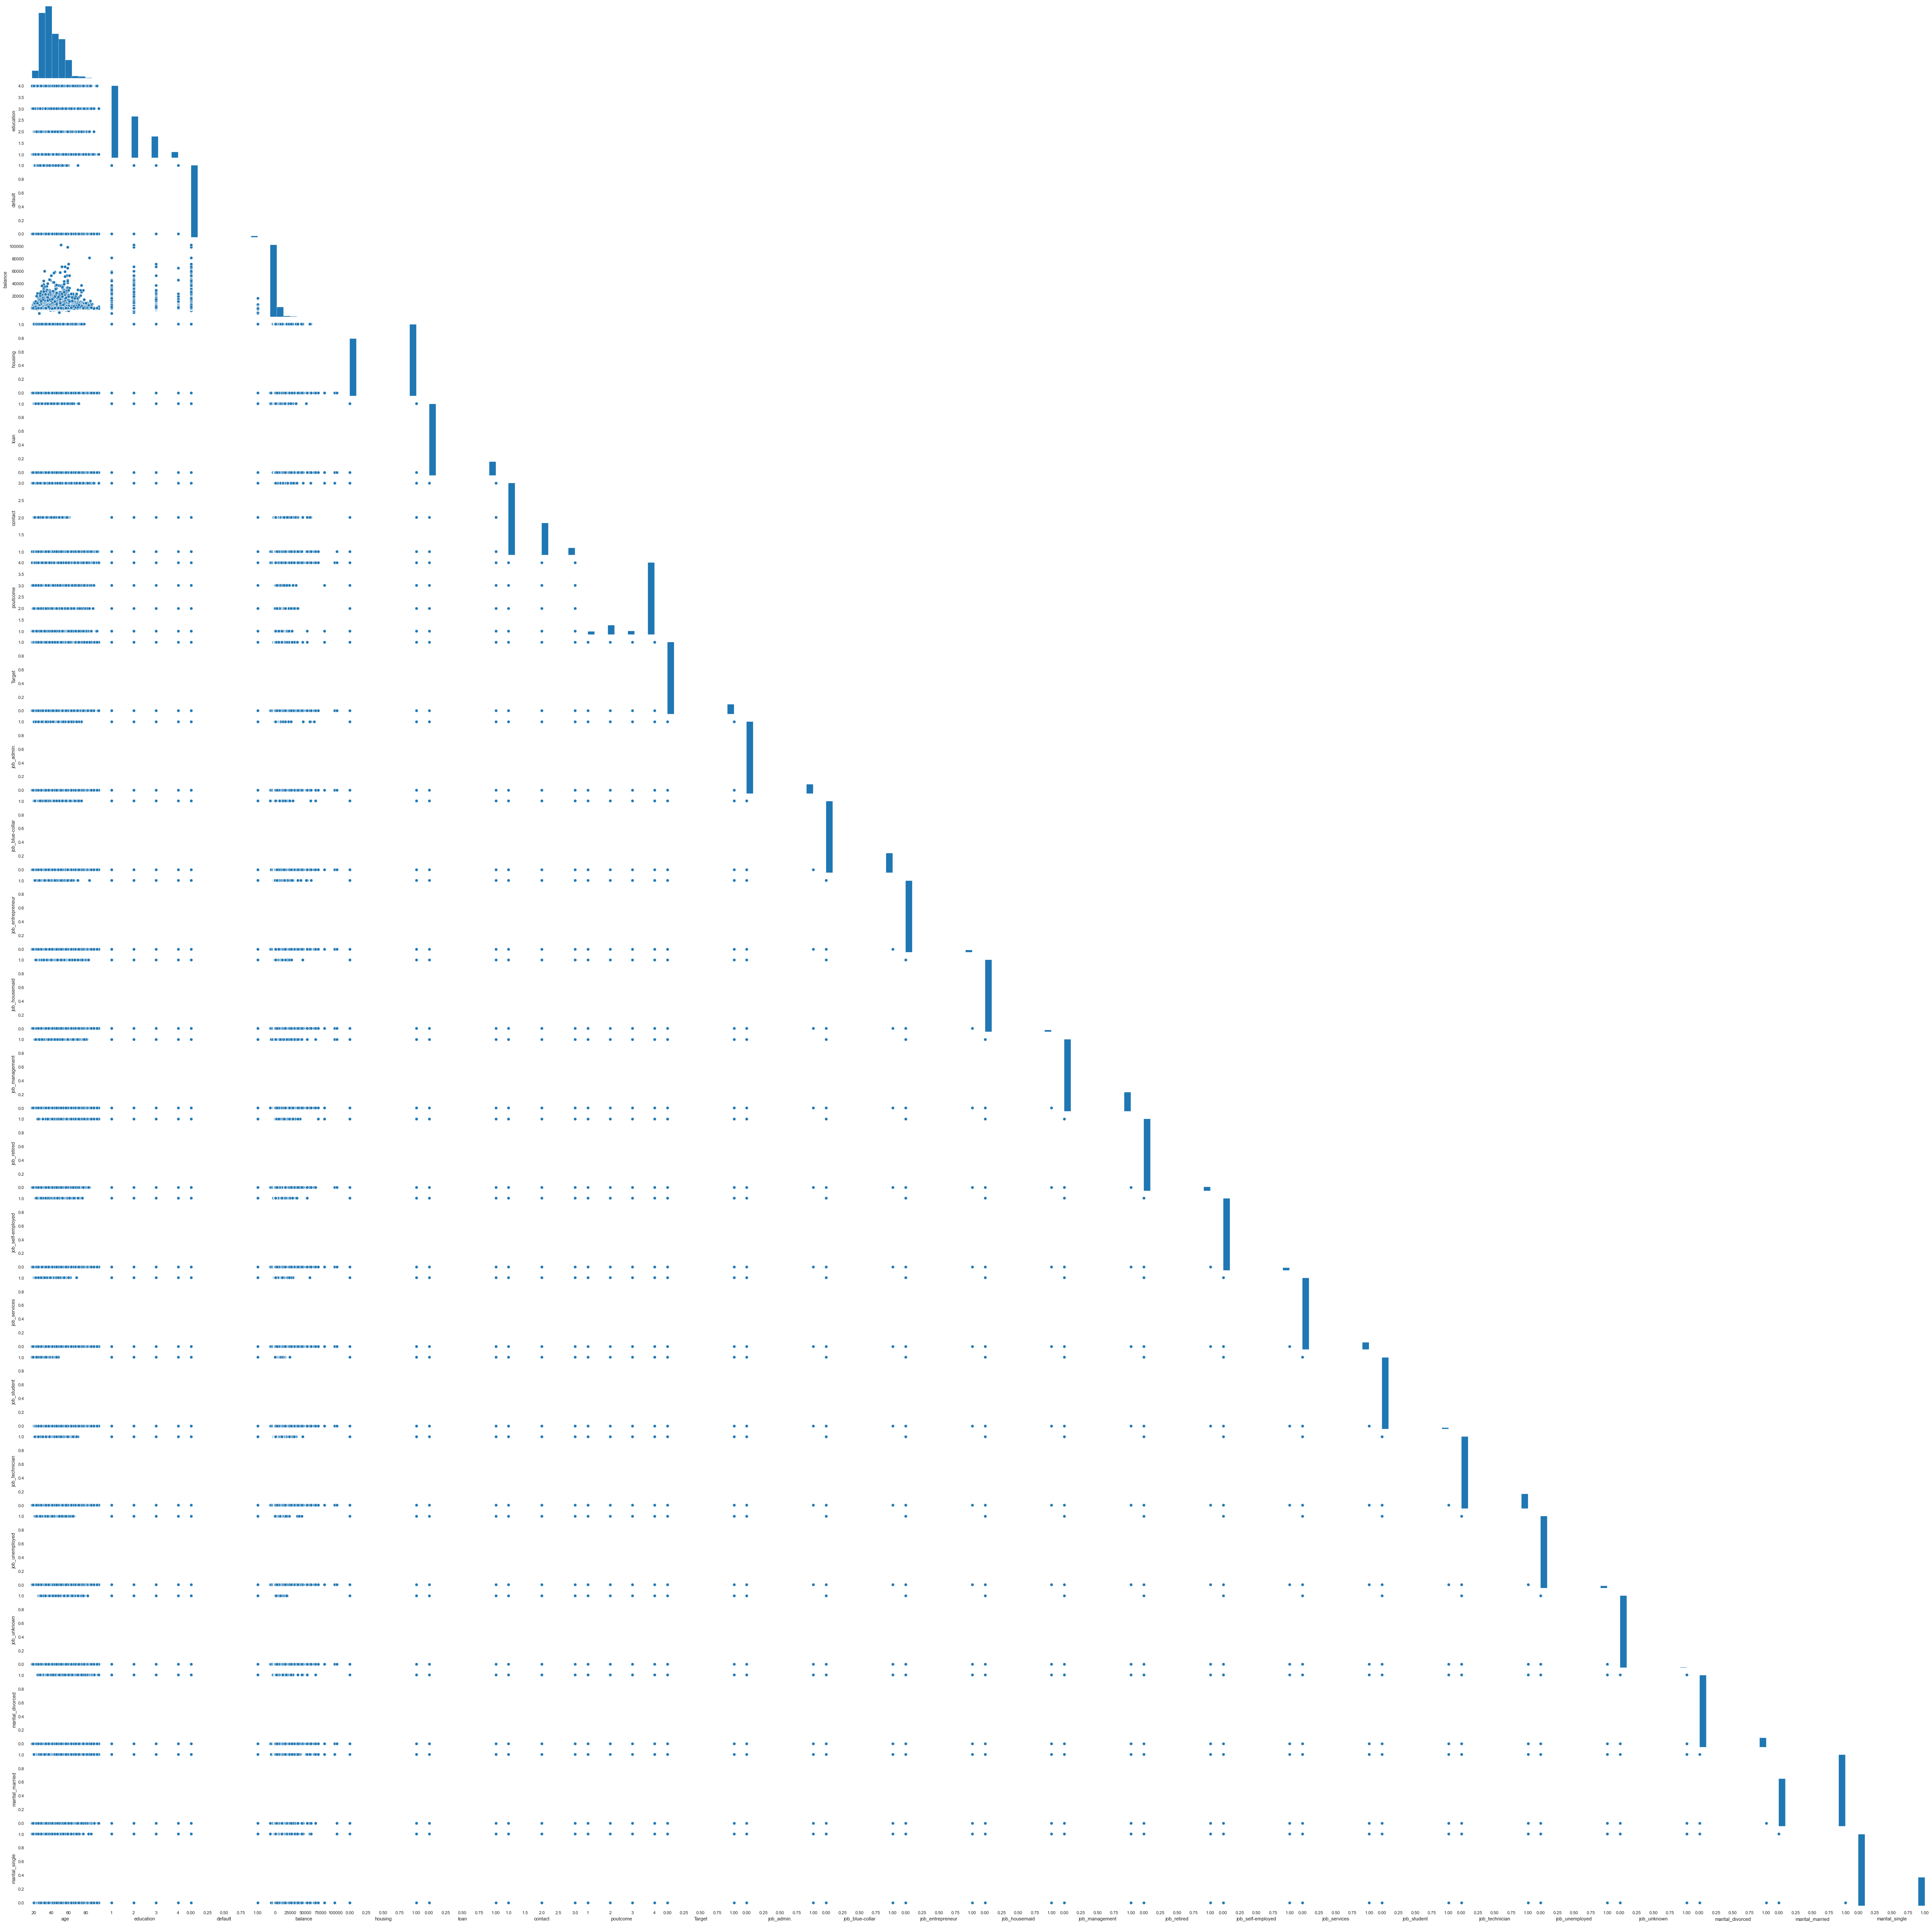

In [244]:
#pairplot of the data
sns.pairplot(TermData,diag_kind='auto', corner=True)

### Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [245]:
#splitting the data in 70/30 ratio - 70 to training; 30 to test data
X = TermData.drop("Target" , axis=1)
y = TermData.pop("Target")
#Y = TermData['balance']
#X = TermData.drop(columns = {'balance'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

X_train.head()

,age,education,default,balance,housing,loan,contact,poutcome,job_admin.,job_blue-collar,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
6149,32,1,1,-238,1,0,2,4,0,1,...,0,0,0,0,0,0,0,0,1,0
12403,34,1,0,-478,1,1,2,4,1,0,...,0,0,0,0,0,0,0,0,0,1
21645,32,1,0,266,1,0,1,4,0,0,...,0,0,0,0,1,0,0,0,1,0
29580,36,1,1,13,0,1,1,4,0,1,...,0,0,0,0,0,0,0,0,1,0
31245,23,1,0,486,0,0,1,4,0,0,...,0,0,0,1,0,0,0,0,0,1


In [246]:
#Checking the data split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(TermData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(TermData.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [247]:
# Fit the Logistic Regression model on the training data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

#predict metric on test
y_predict = model.predict(X_test)

Training Data Accuracy: 88.60%
Test Data Accuracy: 88.83%
Precision: 5.48%
Recall: 63.43%
F1 Score: 10.09%


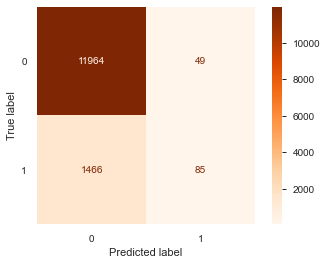

In [248]:
#Displaying the Logistic model Train/Test data Accuracy, Precision, Recall, 
    #F1 Score and ROC AUC metrics

print('Training Data Accuracy: {0:0.2f}%'.format( model.score(X_train, y_train) *100))
print ('Test Data Accuracy: {0:0.2f}%'.format(model.score(X_test, y_test)*100))
print ('Precision: {0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100))
print('Recall: {0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100))
print('F1 Score: {0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100))

# Variables for the model comparisions
LogAccuracy = '{0:0.2f}%'.format(model.score(X_train, y_train)*100)
LogTestAcc = '{0:0.2f}%'.format(model.score(X_test, y_test)*100)
LogPrecision = '{0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100)
LogRecall = '{0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100)
LogF1 = '{0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100)

#Display the confusion matrix
metrics.plot_confusion_matrix(model,X_test,  y_test, values_format='d',cmap='Oranges')

In [210]:
#building the Decision Tree
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Decision Tree Accuracy: 99.73%
Test Data Accuracy: 82.49%
Precision: 31.01%
Recall: 26.93%
F1 Score: 28.83%


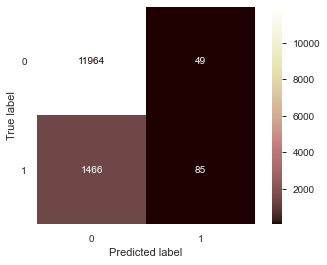

In [249]:
#Display the Decision Tree model Train/Test data Accuracy, Precision, Recall, 
    #F1 Score and ROC AUC metrics
y_predict = dTree.predict(X_test)

print('Decision Tree Accuracy: {0:0.2f}%'.format(dTree.score(X_train , y_train)*100))
print ('Test Data Accuracy: {0:0.2f}%'.format(dTree.score(X_test, y_test)*100))
print ('Precision: {0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100))
print('Recall: {0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100))
print('F1 Score: {0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100))


# Variables for the model comparisions
DTAccuracy = '{0:0.2f}%'.format(dTree.score(X_train , y_train)*100)
DTtest = '{0:0.2f}%'.format(dTree.score(X_test, y_test)*100)
DTPrecision = '{0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100)
DTRecall = '{0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100)
DTF1 = '{0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100)

#Display the confusion matrix
metrics.plot_confusion_matrix(model,X_test,  y_test, values_format='d',cmap='pink')


In [250]:
#building the Bagging model 
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=60,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

Bagging Accuracy: 99.69%
Test Data Accuracy: 88.15%
Precision: 21.60%
Recall: 46.08%
F1 Score: 29.41%


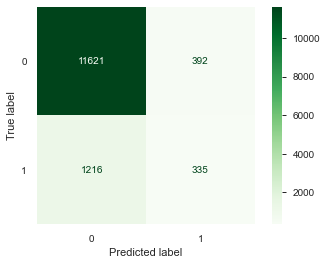

In [251]:
#Display the Bagging model Train/Test data Accuracy, Precision, Recall, 
    #F1 Score and ROC AUC metrics
y_predict = bgcl.predict(X_test)

print('Bagging Accuracy: {0:0.2f}%'.format(bgcl.score(X_train, y_train)*100))
print ('Test Data Accuracy: {0:0.2f}%'.format(bgcl.score(X_test, y_test)*100))
print ('Precision: {0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100))
print('Recall: {0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100))
print('F1 Score: {0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100))

# Variables for the model comparisions
BagAccuracy = '{0:0.2f}%'.format(bgcl.score(X_test , y_test)*100)
BagTest = '{0:0.2f}%'.format(bgcl.score(X_test, y_test)*100)
BagPrecision ='{0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100)
BagRecall = '{0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100)
BagF1 = '{0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100)

#Display confusion matrix
metrics.plot_confusion_matrix(bgcl,X_test,  y_test, values_format='d',cmap='Greens')


In [252]:
#building the Boosting Model
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=60, random_state=1)
abcl = abcl.fit(X_train, y_train)



Boosting Accuracy: 89.20%
Test Data Accuracy: 89.44%
Precision: 16.89%
Recall: 64.53%
F1 Score: 26.78%


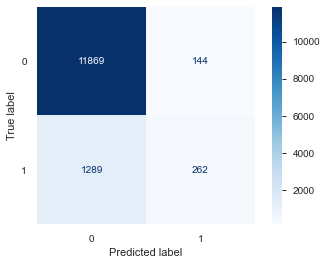

In [253]:
#Display the Boosting model Train/Test data Accuracy, Precision, Recall, 
    #F1 Score and ROC AUC metrics

y_predict = abcl.predict(X_test)
print('Boosting Accuracy: {0:0.2f}%'.format(abcl.score(X_train , y_train)*100))
print ('Test Data Accuracy: {0:0.2f}%'.format(abcl.score(X_test, y_test)*100))
print ('Precision: {0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100))
print('Recall: {0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100))
print('F1 Score: {0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100))

# Variables for the model comparisions
BoostAccuracy = '{0:0.2f}%'.format(abcl.score(X_test , y_test)*100)
BoostTest = '{0:0.2f}%'.format(abcl.score(X_test, y_test)*100)
BoostPrecision = '{0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100)
BoostRecall = '{0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100)
BoostF1 ='{0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100)

#Display confusion matrix
metrics.plot_confusion_matrix(abcl,X_test,  y_test, values_format='d',cmap='Blues')


In [254]:
#building the Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 60, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

Random Forest Accuracy: 99.70%
Test Data Accuracy: 88.22%
Precision: 21.21%
Recall: 46.67%
F1 Score: 29.17%


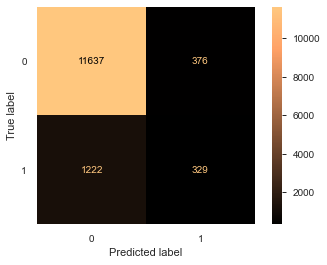

In [255]:
#Display the Random Forest model Train/Test data Accuracy, Precision, Recall, 
    #F1 Score and ROC AUC metrics

y_predict = rfcl.predict(X_test)
print('Random Forest Accuracy: {0:0.2f}%'.format(rfcl.score(X_train, y_train)*100))
print ('Test Data Accuracy: {0:0.2f}%'.format(rfcl.score(X_test, y_test)*100))
print ('Precision: {0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100))
print('Recall: {0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100))
print('F1 Score: {0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100))

# Variables for the model comparisions
RFAccuracy = '{0:0.2f}%'.format(rfcl.score(X_train, y_train)*100)
RFTest = '{0:0.2f}%'.format(rfcl.score(X_test, y_test)*100)
RFPrecision = '{0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100)
RFRecall = '{0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100)
RFF1 ='{0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100)

#Display confusion matrix
metrics.plot_confusion_matrix(rfcl,X_test,  y_test, values_format='d',cmap='copper')

In [256]:
#Building and Displaying matrix of the models comparision
TDAccuracy=[LogAccuracy,DTAccuracy,BagAccuracy,BoostAccuracy,RFAccuracy]
TDTestAcc = [LogTestAcc,DTtest,BagTest,BoostTest,RFTest]
TDPrecision=[LogPrecision,DTPrecision,BagPrecision,BoostPrecision,RFPrecision]
TDRecall=[LogRecall,DTRecall,BagRecall,BoostRecall,RFRecall]
TDF1 = [LogF1,DTF1,BagF1,BoostF1,RFF1]

col={'Training Data Accuracy':TDAccuracy,'Test Data Accuracy':TDTestAcc,'Precision':TDPrecision, 'Recall':TDRecall, 'F1 Score': TDF1}
models=['Logistic Regression','Decision Tree','Bagging','Boosting','Random Forest']
dfModels=pd.DataFrame(data=col,index=models)
dfModels

,Training Data Accuracy,Test Data Accuracy,Precision,Recall,F1 Score
Logistic Regression,88.60%,88.83%,5.48%,63.43%,10.09%
Decision Tree,99.73%,82.49%,31.01%,26.93%,28.83%
Bagging,88.15%,88.15%,21.60%,46.08%,29.41%
Boosting,89.44%,89.44%,16.89%,64.53%,26.78%
Random Forest,99.70%,88.22%,21.21%,46.67%,29.17%


### Conclusion:

### The Decision Tree model is the best choice, in this case because not only did the Training Accuracy score very high, but the Precision and Recall scores are close percentage indicating the model has a balanced False Positive and False Negative accuracy.


